In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Загрузим очищенную выборку.
Можете использовать данные из прошлой лабораторной работы

In [24]:
df = pd.read_csv('/content/drive/MyDrive/Введение в нейронные сети/Занятие 5/train.csv')
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,Male,22.0,1,0,7.2500,3
1,2,1,1,female,38.0,1,0,71.2833,1
2,3,1,3,female,26.0,0,0,7.9250,3
3,4,1,1,female,35.0,1,0,53.1000,3
4,5,0,3,Male,35.0,0,0,8.0500,3
...,...,...,...,...,...,...,...,...,...
884,887,0,2,Male,27.0,0,0,13.0000,3
885,888,1,1,female,19.0,0,0,30.0000,3
886,889,0,3,female,60.0,1,2,23.4500,3
887,890,1,1,Male,26.0,0,0,30.0000,1


In [25]:
df.drop(['PassengerId'],axis=1,inplace=True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,Male,22.0,1,0,7.2500,3
1,1,1,female,38.0,1,0,71.2833,1
2,1,3,female,26.0,0,0,7.9250,3
3,1,1,female,35.0,1,0,53.1000,3
4,0,3,Male,35.0,0,0,8.0500,3
...,...,...,...,...,...,...,...,...
884,0,2,Male,27.0,0,0,13.0000,3
885,1,1,female,19.0,0,0,30.0000,3
886,0,3,female,60.0,1,2,23.4500,3
887,1,1,Male,26.0,0,0,30.0000,1


Проверим пропуски

In [26]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


Выполним замену признака Пол на числовые значения любым способом, например,

In [27]:
sex_scale={'female':1,'male':0,'Male':0,'Female':1}
df['Sex'] = df['Sex'].replace(sex_scale)
df

<ipython-input-27-463781b64063>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sex'] = df['Sex'].replace(sex_scale)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,3
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,3
3,1,1,1,35.0,1,0,53.1000,3
4,0,3,0,35.0,0,0,8.0500,3
...,...,...,...,...,...,...,...,...
884,0,2,0,27.0,0,0,13.0000,3
885,1,1,1,19.0,0,0,30.0000,3
886,0,3,1,60.0,1,2,23.4500,3
887,1,1,0,26.0,0,0,30.0000,1


Построим матрицу корреляции

<Axes: >

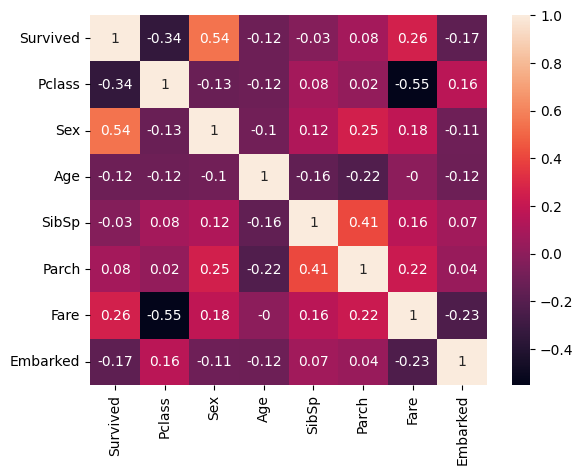

In [28]:
dfc=df.corr().round(2)
sns.heatmap(data=dfc,annot=True)

Выделим целевой признак

In [29]:
Y=df['Survived']
Y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
884,0
885,1
886,0
887,1


Остальное - Х

In [30]:
X=df.drop(['Survived'],axis=1)
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,3
1,1,1,38.0,1,0,71.2833,1
2,3,1,26.0,0,0,7.9250,3
3,1,1,35.0,1,0,53.1000,3
4,3,0,35.0,0,0,8.0500,3
...,...,...,...,...,...,...,...
884,2,0,27.0,0,0,13.0000,3
885,1,1,19.0,0,0,30.0000,3
886,3,1,60.0,1,2,23.4500,3
887,1,0,26.0,0,0,30.0000,1


Можно загрузить данные для теста

In [31]:
dft = pd.read_csv('/content/drive/MyDrive/Введение в нейронные сети/Занятие 5/test.csv',index_col='PassengerId')
dft

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


Этот датасет требует  обработки!!! Обязательное задание

Survived      0
Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64
Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
             Survived  Pclass  Sex   Age  SibSp  Parch      Fare  Embarked
PassengerId                                                               
892                 0       3    0  34.5      0      0    7.8292         2
893                 1       3    1  47.0      1      0    7.0000         1
894                 0       2    0  62.0      0      0    9.6875         2
895                 0       3    0  27.0      0      0    8.6625         1
896                 1       3    1  22.0      1      1   12.2875         1
...               ...     ...  ...   ...    ...    ...       ...       ...
1305                0       3    0  29.0      0      0    8.0500         1
1306       

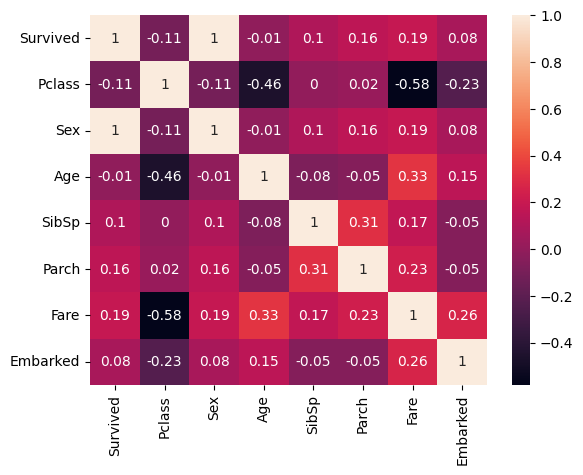

In [32]:
dft = pd.read_csv('/content/drive/MyDrive/Введение в нейронные сети/Занятие 5/test.csv', index_col='PassengerId')

print(dft.isna().sum())

dft.drop(['Name', 'Cabin', 'Ticket'], axis=1, inplace=True)

dft.loc[dft['Sex'] == 'female', 'Age'] = dft.loc[dft['Sex'] == 'female', 'Age'].fillna(27)
dft.loc[dft['Sex'] == 'male', 'Age'] = dft.loc[dft['Sex'] == 'male', 'Age'].fillna(29)

dft.loc[dft['Pclass'] == 1, 'Fare'] = dft.loc[dft['Pclass'] == 1, 'Fare'].fillna(60)
dft.loc[dft['Pclass'] == 2, 'Fare'] = dft.loc[dft['Pclass'] == 2, 'Fare'].fillna(14)
dft.loc[dft['Pclass'] == 3, 'Fare'] = dft.loc[dft['Pclass'] == 3, 'Fare'].fillna(8)

sex_scale = {'female': 1, 'male': 0, 'Male': 0, 'Female': 1}
dft['Sex'] = dft['Sex'].map(sex_scale).astype(int)

embarked_scale = {'S': 1, 'Q': 2, 'C': 3}
dft['Embarked'] = dft['Embarked'].map(embarked_scale).astype(int)

print(dft.isna().sum())
print(dft)

dfc = dft.corr().round(2)

sns.heatmap(data=dfc, annot=True)

Y_mytest = dft['Survived']
X_mytest = dft.drop(['Survived'], axis=1)

print(Y_mytest.shape)


Или временно можно для разделить тренеровачный датасет

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=5)

In [34]:
X_train.shape

(800, 7)

Создадим модель DecisionTree

In [35]:
from sklearn.tree import DecisionTreeClassifier
dtf = DecisionTreeClassifier(random_state=0)
dtf.fit(X_train,Y_train)
pred_1=dtf.predict(X_test)

Построим матрицу ошибки

In [36]:
df1=pd.crosstab(Y_test,pred_1)
df1

col_0,0,1
Survived,,
0,45,14
1,6,24


Выполним оценку

In [37]:
from sklearn.metrics import accuracy_score,precision_score,recall_score
print('accuracy',accuracy_score(Y_test,pred_1))
print('precision',precision_score(Y_test,pred_1))
print('recall',recall_score(Y_test,pred_1))

accuracy 0.7752808988764045
precision 0.631578947368421
recall 0.8


Общий отчёт, проанализируйте результат

In [38]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,pred_1))

              precision    recall  f1-score   support

           0       0.88      0.76      0.82        59
           1       0.63      0.80      0.71        30

    accuracy                           0.78        89
   macro avg       0.76      0.78      0.76        89
weighted avg       0.80      0.78      0.78        89



Построим кривые ROC

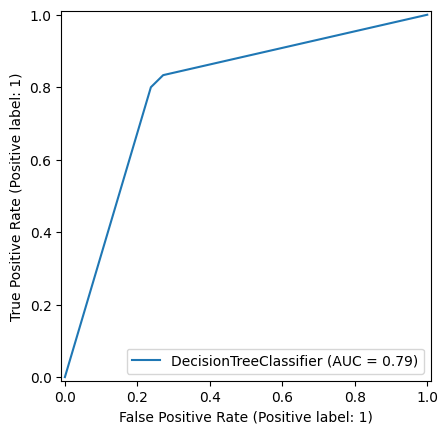

In [39]:
from sklearn.metrics import RocCurveDisplay
dtf_disp = RocCurveDisplay.from_estimator(dtf, X_test, Y_test)
plt.show()

Постройте другие модели (не менее 5-ти)
Разместите графики ROC на одном рисунке

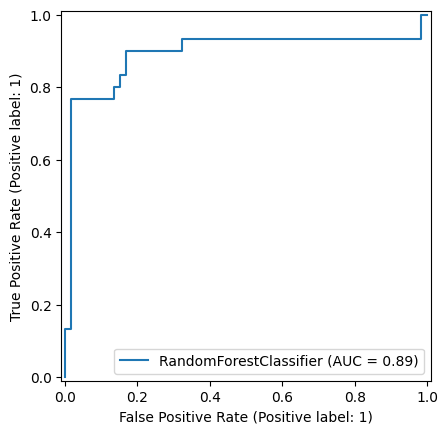

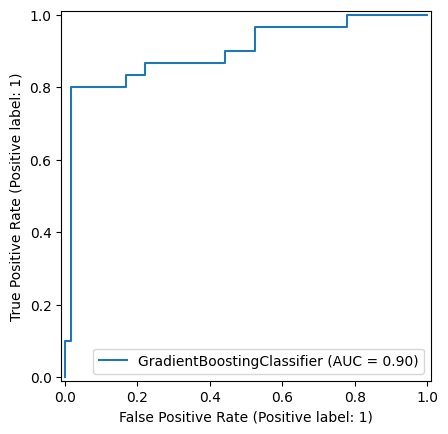

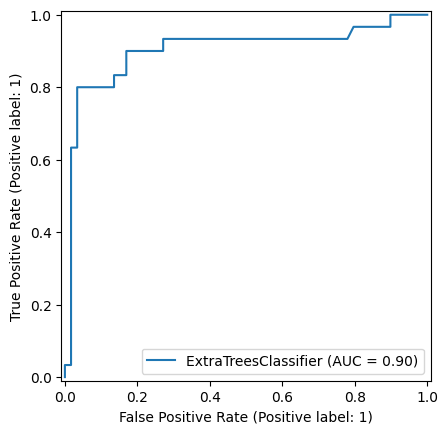

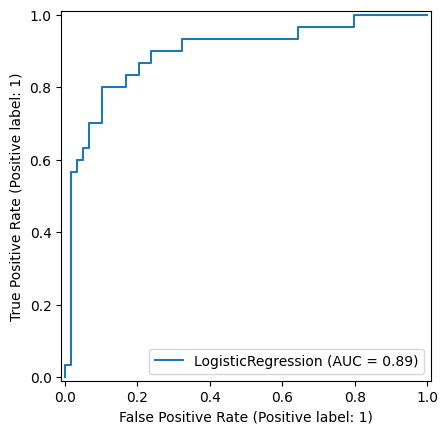

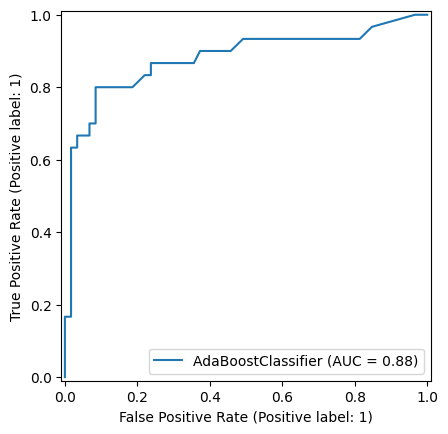

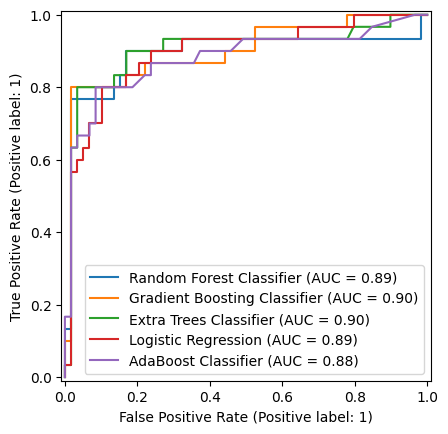

In [40]:
from sklearn.metrics import RocCurveDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier


rfc = RandomForestClassifier(n_estimators=100,max_depth=5,random_state=0)
rfc.fit(X_train,Y_train)
gbc = GradientBoostingClassifier(n_estimators=100, max_depth=5, random_state=0)
gbc.fit(X_train, Y_train)
etc = ExtraTreesClassifier(n_estimators=100, max_depth=5, random_state=0)
etc.fit(X_train, Y_train)
lr = LogisticRegression(random_state=0)
lr.fit(X_train, Y_train)
ab = AdaBoostClassifier(random_state=0)
ab.fit(X_train, Y_train)

rfc_disp = RocCurveDisplay.from_estimator(rfc, X_test, Y_test)
gbc_disp = RocCurveDisplay.from_estimator(gbc, X_test, Y_test)
etc_disp = RocCurveDisplay.from_estimator(etc, X_test, Y_test)
lr_disp = RocCurveDisplay.from_estimator(lr, X_test, Y_test)
ab_disp = RocCurveDisplay.from_estimator(ab, X_test, Y_test)


plt.figure()
rfc_disp.plot(ax=plt.gca(), name='Random Forest Classifier')
gbc_disp.plot(ax=plt.gca(), name='Gradient Boosting Classifier')
etc_disp.plot(ax=plt.gca(), name='Extra Trees Classifier')
lr_disp.plot(ax=plt.gca(), name='Logistic Regression')
ab_disp.plot(ax=plt.gca(), name='AdaBoost Classifier')
plt.show()



Обучите модели на полном наборе. Для тестирования используйте отдельный набор

In [41]:
#ваш код
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score


rfc=RandomForestClassifier(n_estimators=100,max_depth=5,random_state=1)
rfc.fit(X,Y)
predForest=rfc.predict(X_mytest)
print()
print('Оценка RandomForestClassifier')
print('accuracy',accuracy_score(Y_mytest,predForest))
print('precision',precision_score(Y_mytest,predForest))
print('recall',recall_score(Y_mytest,predForest))
print('Матрица ошибок:')
dfForest=pd.crosstab(Y_mytest,predForest)
print(dfForest)
print('classification report для RandomForestClassifier')
print(classification_report(Y_mytest,predForest))



gbc = GradientBoostingClassifier(n_estimators=100, max_depth=5, random_state=0)
gbc.fit(X, Y)
predGrd=gbc.predict(X_mytest)
print()
print('Оценка GradientBoostingClassifier')
print('accuracy',accuracy_score(Y_mytest,predGrd))
print('precision',precision_score(Y_mytest,predGrd))
print('recall',recall_score(Y_mytest,predGrd))
print('classification report для GradientBoostingClassifier')
print(classification_report(Y_mytest,predGrd))

etc = ExtraTreesClassifier(n_estimators=100, max_depth=5, random_state=0)
etc.fit(X,Y)
predEt=etc.predict(X_mytest)
print()
print('Оценка ExtraTreesClassifier')
print('accuracy',accuracy_score(Y_mytest,predEt))
print('precision',precision_score(Y_mytest,predEt))
print('recall',recall_score(Y_mytest,predEt))
print('classification report для ExtraTreesClassifier')
print(classification_report(Y_mytest,predEt))

lr = LogisticRegression(random_state=0)
lr.fit(X,Y)
predLr=lr.predict(X_mytest)
print()
print('Оценка LogisticRegression')
print('accuracy',accuracy_score(Y_mytest,predLr))
print('precision',precision_score(Y_mytest,predLr))
print('recall',recall_score(Y_mytest,predLr))
print('classification report для LogisticRegression')
print(classification_report(Y_mytest,predLr))

ab = AdaBoostClassifier(random_state=0)
ab.fit(X,Y)
predAb=ab.predict(X_mytest)
print()
print('Оценка AdaBoostClassifier')
print('accuracy',accuracy_score(Y_mytest,predAb))
print('precision',precision_score(Y_mytest,predAb))
print('recall',recall_score(Y_mytest,predAb))
print('classification report для AdaBoostClassifier')
print(classification_report(Y_mytest,predAb))



Оценка RandomForestClassifier
accuracy 0.9712918660287081
precision 0.9487179487179487
recall 0.9736842105263158
Матрица ошибок:
col_0       0    1
Survived          
0         258    8
1           4  148
classification report для RandomForestClassifier
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       266
           1       0.95      0.97      0.96       152

    accuracy                           0.97       418
   macro avg       0.97      0.97      0.97       418
weighted avg       0.97      0.97      0.97       418


Оценка GradientBoostingClassifier
accuracy 0.854066985645933
precision 0.7724550898203593
recall 0.8486842105263158
classification report для GradientBoostingClassifier
              precision    recall  f1-score   support

           0       0.91      0.86      0.88       266
           1       0.77      0.85      0.81       152

    accuracy                           0.85       418
   macro avg       0.84      0

Уменьшите количество признаков (см. матрицу корреляции)
Постройте модели и проанализируйте результаты

In [42]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_mytest_scaled = scaler.transform(X_mytest)

# Применение PCA для уменьшения размерности
pca = PCA(n_components=0.95)  # Оставляем 95% дисперсии
X_pca = pca.fit_transform(X_scaled)
X_mytest_pca = pca.transform(X_mytest_scaled)

print('Таблица до уменьшения признаков:')
print(X.shape)
print('Таблица после уменьшения признаков (PCA):')
print(X_pca.shape)

# Список моделей для тестирования
models = [
    ('RandomForestClassifier', RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)),
    ('GradientBoostingClassifier', GradientBoostingClassifier(n_estimators=100, max_depth=5, random_state=0)),
    ('ExtraTreesClassifier', ExtraTreesClassifier(n_estimators=100, max_depth=5, random_state=0)),
    ('LogisticRegression', LogisticRegression(random_state=0)),
    ('AdaBoostClassifier', AdaBoostClassifier(random_state=0))
]

# Обучение и оценка моделей
for name, model in models:
    model.fit(X_pca, Y)
    pred = model.predict(X_mytest_pca)

    print(f'\nОценка {name}:')
    print('Accuracy:', accuracy_score(Y_mytest, pred))
    print('Precision:', precision_score(Y_mytest, pred))
    print('Recall:', recall_score(Y_mytest, pred))
    print('Матрица ошибок:')
    print(pd.crosstab(Y_mytest, pred))
    print('Classification Report:')
    print(classification_report(Y_mytest, pred))

Таблица до уменьшения признаков:
(889, 7)
Таблица после уменьшения признаков (PCA):
(889, 7)

Оценка RandomForestClassifier:
Accuracy: 0.8923444976076556
Precision: 0.786096256684492
Recall: 0.9671052631578947
Матрица ошибок:
col_0       0    1
Survived          
0         226   40
1           5  147
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.85      0.91       266
           1       0.79      0.97      0.87       152

    accuracy                           0.89       418
   macro avg       0.88      0.91      0.89       418
weighted avg       0.91      0.89      0.89       418


Оценка GradientBoostingClassifier:
Accuracy: 0.7870813397129187
Precision: 0.6842105263157895
Recall: 0.7697368421052632
Матрица ошибок:
col_0       0    1
Survived          
0         212   54
1          35  117
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.80      0.83       266
  

Увеличьте количество признаков Постройте модели и проанализируйте результаты

In [43]:
#ваш код
from sklearn.preprocessing import PolynomialFeatures, scale

X_fulltable=X
X_fulltabletest=X_mytest
print('Размер до увеличения признаков:')
print(X_fulltable.shape)

X_poly = PolynomialFeatures(include_bias=False).fit_transform(scale(X_fulltable))
X_polytest = PolynomialFeatures(include_bias=False).fit_transform(scale(X_fulltabletest))

print('Размер после увеличения признаков:')
print(X_polytest.shape)
print(X_poly.shape)

rfc=RandomForestClassifier(n_estimators=100,max_depth=5,random_state=1)
rfc.fit(X_poly,Y)
predForest=rfc.predict(X_polytest)
print()
print('Оценка RandomForestClassifier')
print('accuracy',accuracy_score(Y_mytest,predForest))
print('precision',precision_score(Y_mytest,predForest))
print('recall',recall_score(Y_mytest,predForest))
print('classification report для RandomForestClassifier')
print(classification_report(Y_mytest,predForest))



gbc = GradientBoostingClassifier(n_estimators=100, max_depth=5, random_state=0)
gbc.fit(X_poly, Y)
predGrd=gbc.predict(X_polytest)
print()
print('Оценка GradientBoostingClassifier')
print('accuracy',accuracy_score(Y_mytest,predGrd))
print('precision',precision_score(Y_mytest,predGrd))
print('recall',recall_score(Y_mytest,predGrd))
print('classification report для GradientBoostingClassifier')
print(classification_report(Y_mytest,predGrd))

etc = ExtraTreesClassifier(n_estimators=100, max_depth=5, random_state=0)
etc.fit(X_poly,Y)
predEt=etc.predict(X_polytest)
print()
print('Оценка ExtraTreesClassifier')
print('accuracy',accuracy_score(Y_mytest,predEt))
print('precision',precision_score(Y_mytest,predEt))
print('recall',recall_score(Y_mytest,predEt))
print('classification report для ExtraTreesClassifier')
print(classification_report(Y_mytest,predEt))

lr = LogisticRegression(random_state=0)
lr.fit(X_poly,Y)
predLr=lr.predict(X_polytest)
print()
print('Оценка LogisticRegression')
print('accuracy',accuracy_score(Y_mytest,predLr))
print('precision',precision_score(Y_mytest,predLr))
print('recall',recall_score(Y_mytest,predLr))
print('classification report для LogisticRegression')
print(classification_report(Y_mytest,predLr))

ab = AdaBoostClassifier(random_state=0)
ab.fit(X_poly,Y)
predAb=ab.predict(X_polytest)
print()
print('Оценка AdaBoostClassifier')
print('accuracy',accuracy_score(Y_mytest,predAb))
print('precision',precision_score(Y_mytest,predAb))
print('recall',recall_score(Y_mytest,predAb))
print('classification report для AdaBoostClassifier')
print(classification_report(Y_mytest,predAb))




Размер до увеличения признаков:
(889, 7)
Размер после увеличения признаков:
(418, 35)
(889, 35)

Оценка RandomForestClassifier
accuracy 0.9569377990430622
precision 0.935064935064935
recall 0.9473684210526315
classification report для RandomForestClassifier
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       266
           1       0.94      0.95      0.94       152

    accuracy                           0.96       418
   macro avg       0.95      0.95      0.95       418
weighted avg       0.96      0.96      0.96       418


Оценка GradientBoostingClassifier
accuracy 0.8253588516746412
precision 0.816
recall 0.6710526315789473
classification report для GradientBoostingClassifier
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       266
           1       0.82      0.67      0.74       152

    accuracy                           0.83       418
   macro avg       0.82      0.79      